In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, kurtosis

# Load dataset
file_path = "house_price.csv"  
df = pd.read_csv(file_path)

In [36]:

# Q1: Perform Basic EDA
print("Basic Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None

Summary Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000

mean_price_per_sqft: 7920.336742424242

std_dev_price_per_sqft: 106727.16032810845

lower_bound: -312261.1442419011

upper_bound: 328101.8177267496
lower_percentile: 3107.8500000000004

upper_percentile: 15312.099999999984
Number of outliers detected using percentile method :  1320
Q1: 4267.0

Q3: 7317.0

IQR: 3050.0
IQR_lower_bound: -308.0
IQR_upper_bound: 11892.0
Number of outliers detected by IQR method :  1265
Number of outliers detected using Zscore method :  13200


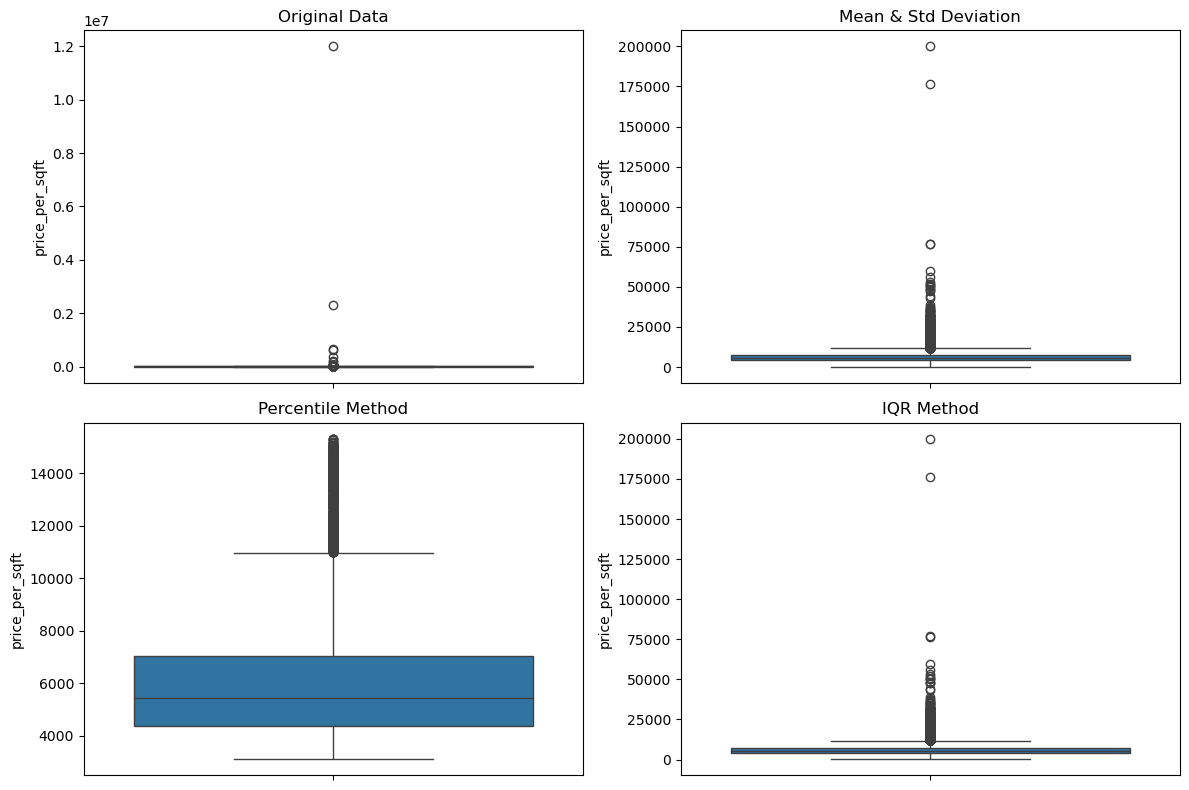

In [81]:


mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
print("mean_price_per_sqft:",mean)
print("\nstd_dev_price_per_sqft:",std)
print("\nlower_bound:",lower_bound)
print("\nupper_bound:",upper_bound)

# Remove outliers
df_mean_std = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
df_mean_std

# Remove values below the 5th percentile and above the 95th percentile
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)
print("lower_percentile:",lower_percentile)
print("\nupper_percentile:",upper_percentile)

df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]
df_percentile

outliers_percentile=df[(df["price_per_sqft"]<lower_percentile)|(df["price_per_sqft"]>upper_percentile)]
print("Number of outliers detected using percentile method : ",len(outliers_percentile))

#(c) IQR (Interquartile Range) Method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
print("Q1:",Q1)
print("\nQ3:",Q3)
print("\nIQR:",IQR)

IQR_lower_bound = Q1 - 1.5 * IQR
IQR_upper_bound = Q3 + 1.5 * IQR
print("IQR_lower_bound:",IQR_lower_bound)
print("IQR_upper_bound:",IQR_upper_bound)

df_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
df_iqr

# detect outliers
outliers_IQR=df[(df["price_per_sqft"]<IQR_lower_bound)|(df["price_per_sqft"]>IQR_upper_bound)]
print("Number of outliers detected by IQR method : ",len(outliers_IQR))

from scipy.stats import zscore

df['z_score'] = zscore(df['price_per_sqft'])

# threshold=3
df_zscore = df[(df['z_score'] >= -3) & (df['z_score'] <= 3)]
df_zscore

# outlier detection
outliers_zscore=df[(df["price_per_sqft"]>3)|(df["price_per_sqft"]<-3)]
print("Number of outliers detected using Zscore method : ",len(outliers_zscore))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(df['price_per_sqft'], ax=axes[0, 0]).set_title("Original Data")
sns.boxplot(df_mean_std['price_per_sqft'], ax=axes[0, 1]).set_title("Mean & Std Deviation")
sns.boxplot(df_percentile['price_per_sqft'], ax=axes[1, 0]).set_title("Percentile Method")
sns.boxplot(df_iqr['price_per_sqft'], ax=axes[1, 1]).set_title("IQR Method")
plt.tight_layout()
plt.show()


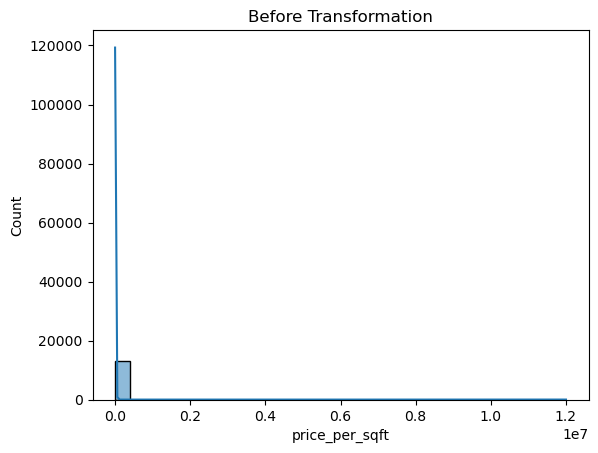

Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


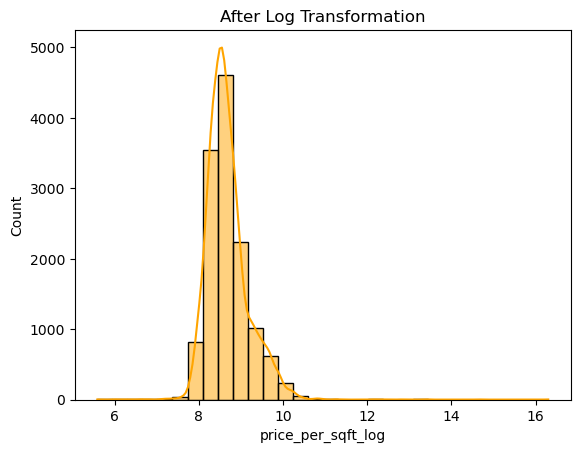

Skewness after Log: 1.4003259019533636
Kurtosis after Log: 9.203000543610957


In [83]:
from scipy.stats import skew, kurtosis

# Histogram before transformation
sns.histplot(df['price_per_sqft'], kde=True, bins=30)
plt.title("Before Transformation")
plt.show()

# Skewness and Kurtosis
print("Skewness:", skew(df['price_per_sqft']))
print("Kurtosis:", kurtosis(df['price_per_sqft']))

# Log Transformation
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

# Histogram after transformation
sns.histplot(df['price_per_sqft_log'], kde=True, bins=30, color='orange')
plt.title("After Log Transformation")
plt.show()

print("Skewness after Log:", skew(df['price_per_sqft_log']))
print("Kurtosis after Log:", kurtosis(df['price_per_sqft_log']))

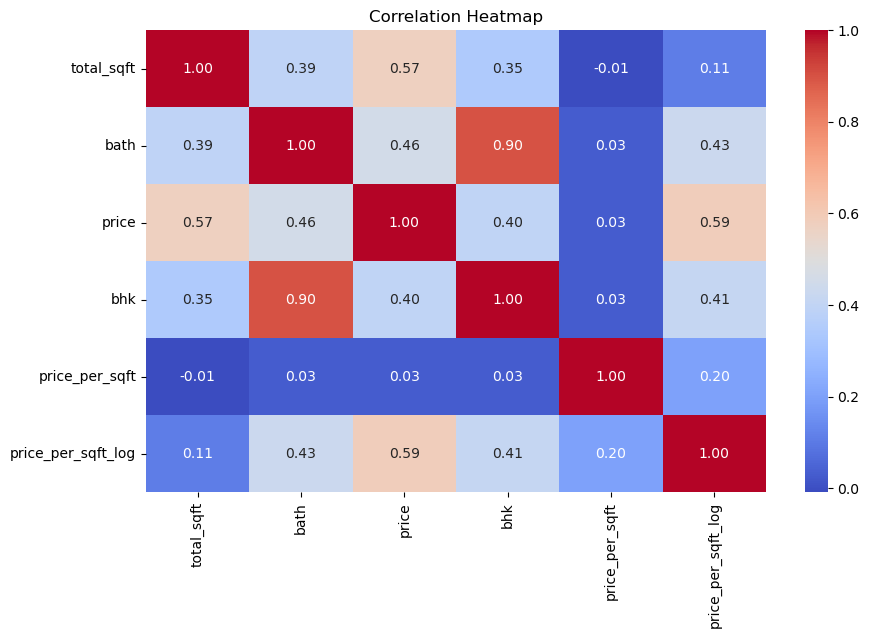

In [40]:
# Q5: Correlation & Heatmap
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

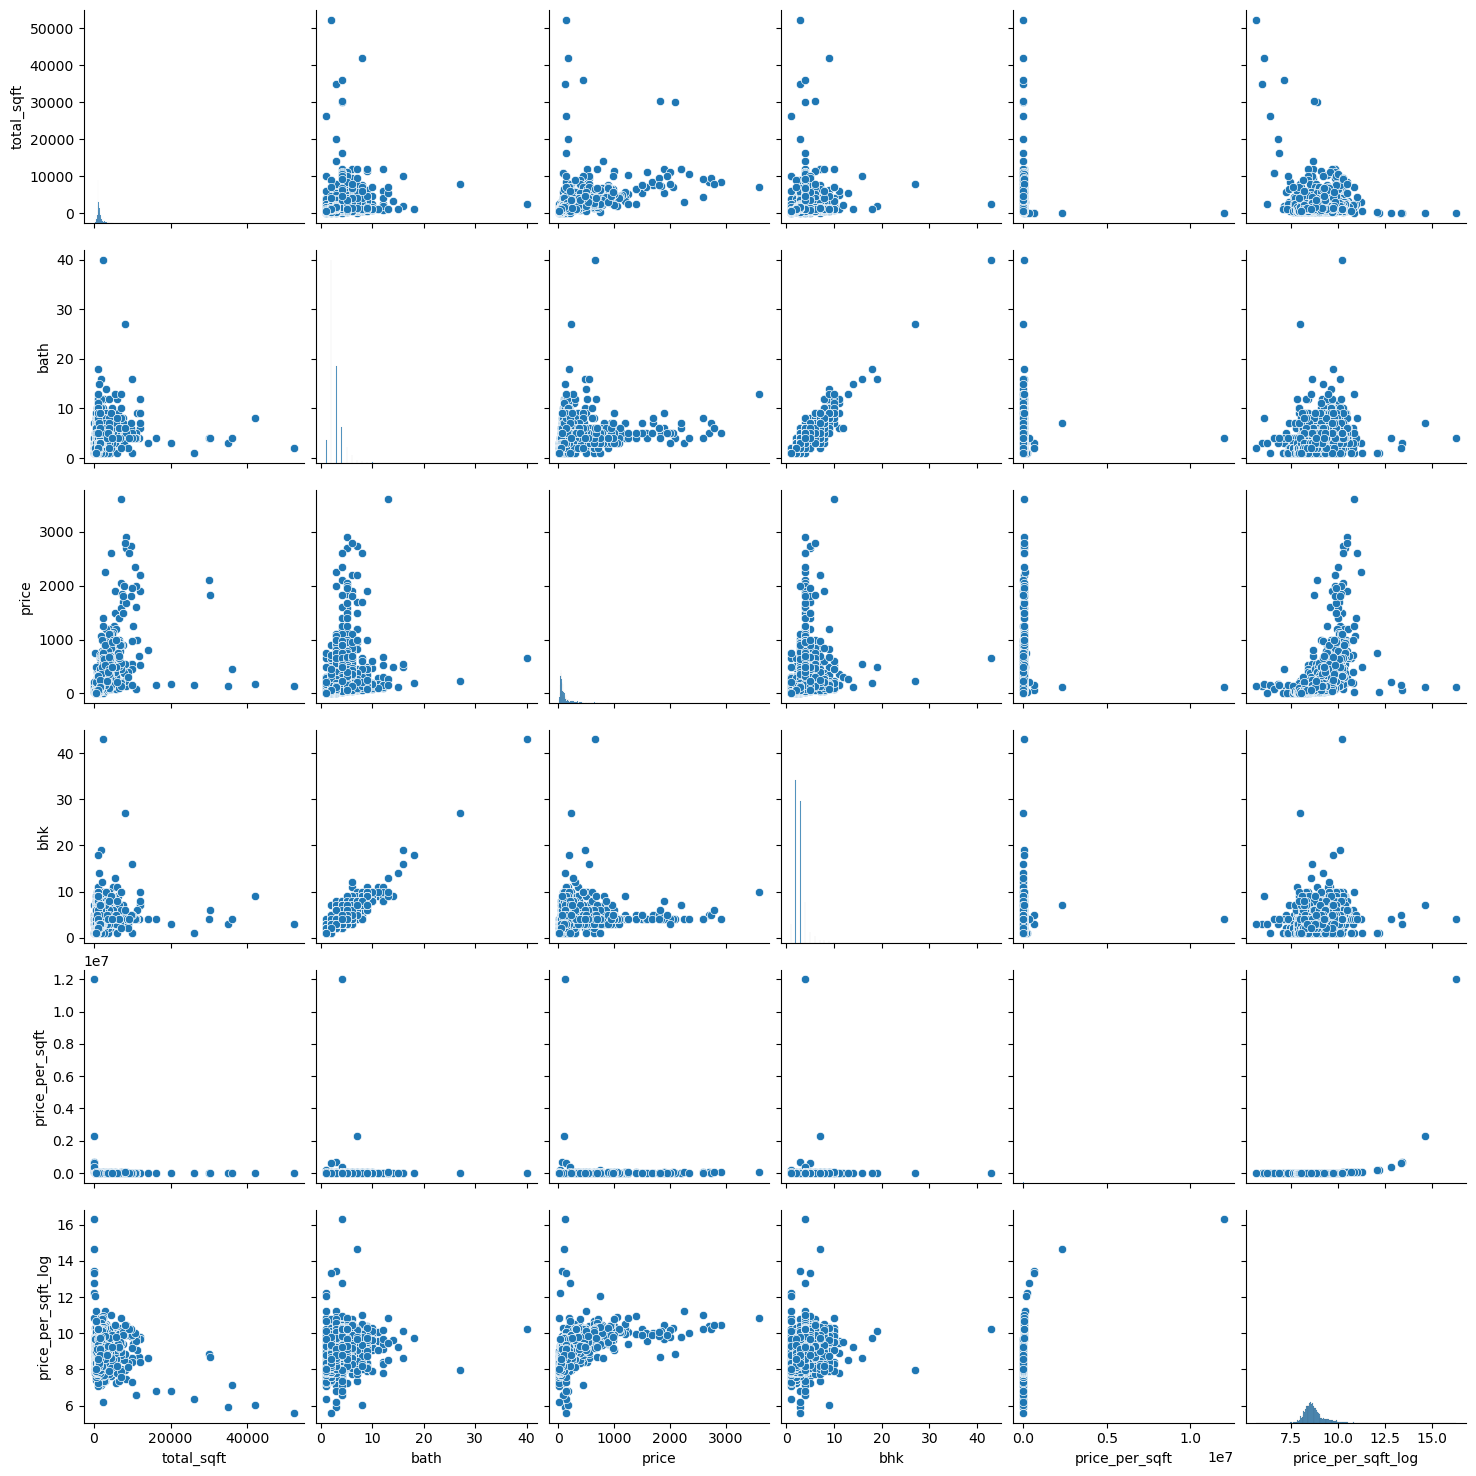

Analysis complete!


In [53]:
# Q6: Scatter Plots
sns.pairplot(numeric_df)
plt.show()

print("Analysis complete!")